# Lab 4

 ***

## Get the data (1 mark)

#### First we get the data from the table and we display the first 10 lines to see if it worked

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("census11sample.csv", index_col=0)
df.head(10)

,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
0,27,32,65,60,44,79,43,8,9
1,10,36,40,19,52,46,58,87,40
2,82,53,60,34,2,29,18,46,57
3,33,63,25,60,9,26,30,52,74
4,55,98,4,47,58,37,18,67,19
5,27,26,66,70,33,41,38,78,63
6,42,44,49,59,40,65,13,8,52
7,62,44,41,76,8,74,54,40,72
8,34,17,33,71,45,73,1,77,75
9,15,46,37,3,13,41,19,47,69


## Divide the data (2 marks)

#### Then we divide the data in two parts, one for exploring the data (df_explore) and one for testing my hypothesis (df_test).

In [39]:
ratio = 0.5
df_explore = df.head(int(ratio*df.shape[0]))
df_test = df.tail(int((1-ratio)*df.shape[0]))


Below we edit both data frames so that they are easier to display, plot and explore
The change it in such a way that we see how many people of that age (the index) are in each location.

In [40]:
age_count_exp = {x:[0 for i in range(101)] for x in list(df_explore)}
for key in list(age_count_exp.keys()):
    counts = df_explore.sort_values(by=key)[key].value_counts()
    age_count_exp[key]=counts
sample_explore = pd.DataFrame(age_count_exp)
sample_explore = sample_explore.dropna().reset_index()

age_count_test = {x:[0 for i in range(101)] for x in list(df_test)}
for key in list(age_count_test.keys()):
    counts = df_test.sort_values(by=key)[key].value_counts()
    age_count_test[key]=counts
sample_test = pd.DataFrame(age_count_test)
sample_test = sample_test.dropna().reset_index()

sample_explore.head(10)

,index,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
0,0,6.0,13.0,3.0,8.0,8.0,5.0,7.0,5.0,8.0
1,1,5.0,4.0,5.0,6.0,2.0,8.0,8.0,5.0,1.0
2,2,5.0,5.0,3.0,4.0,3.0,2.0,9.0,9.0,7.0
3,3,5.0,4.0,4.0,6.0,11.0,8.0,11.0,6.0,4.0
4,4,5.0,12.0,7.0,5.0,4.0,7.0,10.0,2.0,3.0
5,5,2.0,4.0,7.0,7.0,8.0,4.0,7.0,4.0,4.0
6,6,8.0,6.0,3.0,2.0,2.0,7.0,3.0,5.0,2.0
7,7,2.0,3.0,9.0,8.0,6.0,4.0,5.0,8.0,7.0
8,8,6.0,6.0,8.0,6.0,5.0,4.0,8.0,8.0,7.0
9,9,4.0,4.0,4.0,5.0,6.0,4.0,6.0,4.0,4.0


## Explore the data (5 marks)

#### Now we look into the data frame for exploration to notice a pattern and state a hypothesis

We display the age average of each region to try and spot a difference

In [41]:
print("London age average: " + str(df_explore["London"].mean()))
print("Yorkshire and The Humber age average: " + str(df_explore["Yorkshire and The Humber"].mean()))
print("East Midlands age average: " + str(df_explore["East Midlands"].mean()))
print("North West age average: " + str(df_explore["North West"].mean()))
print("South East age average: " + str(df_explore["South East"].mean()))
print("North East age average: " + str(df_explore["North East"].mean()))
print("West Midlands age average: " + str(df_explore["West Midlands"].mean()))
print("East of England age average: " + str(df_explore["East of England"].mean()))
print("South West age average: " + str(df_explore["South West"].mean()))

London age average: 35.074
Yorkshire and The Humber age average: 38.492
East Midlands age average: 38.76
North West age average: 39.53
South East age average: 41.198
North East age average: 41.12
West Midlands age average: 40.582
East of England age average: 42.104
South West age average: 43.428


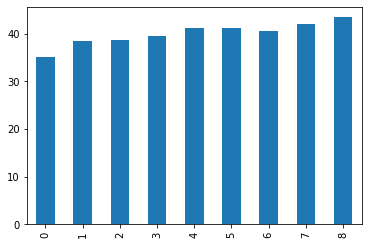

In [42]:
average = (df_explore["London"].mean(), df_explore["Yorkshire and The Humber"].mean(), df_explore["East Midlands"].mean(), df_explore["North West"].mean(), df_explore["South East"].mean(), df_explore["North East"].mean(), df_explore["West Midlands"].mean(), df_explore["East of England"].mean(), df_explore["South West"].mean())

avg = pd.Series(average )

avg.plot(kind = 'bar')

We notice that the average in London si much smaller than the average in South West and then try to find out more about it by plotting the data.

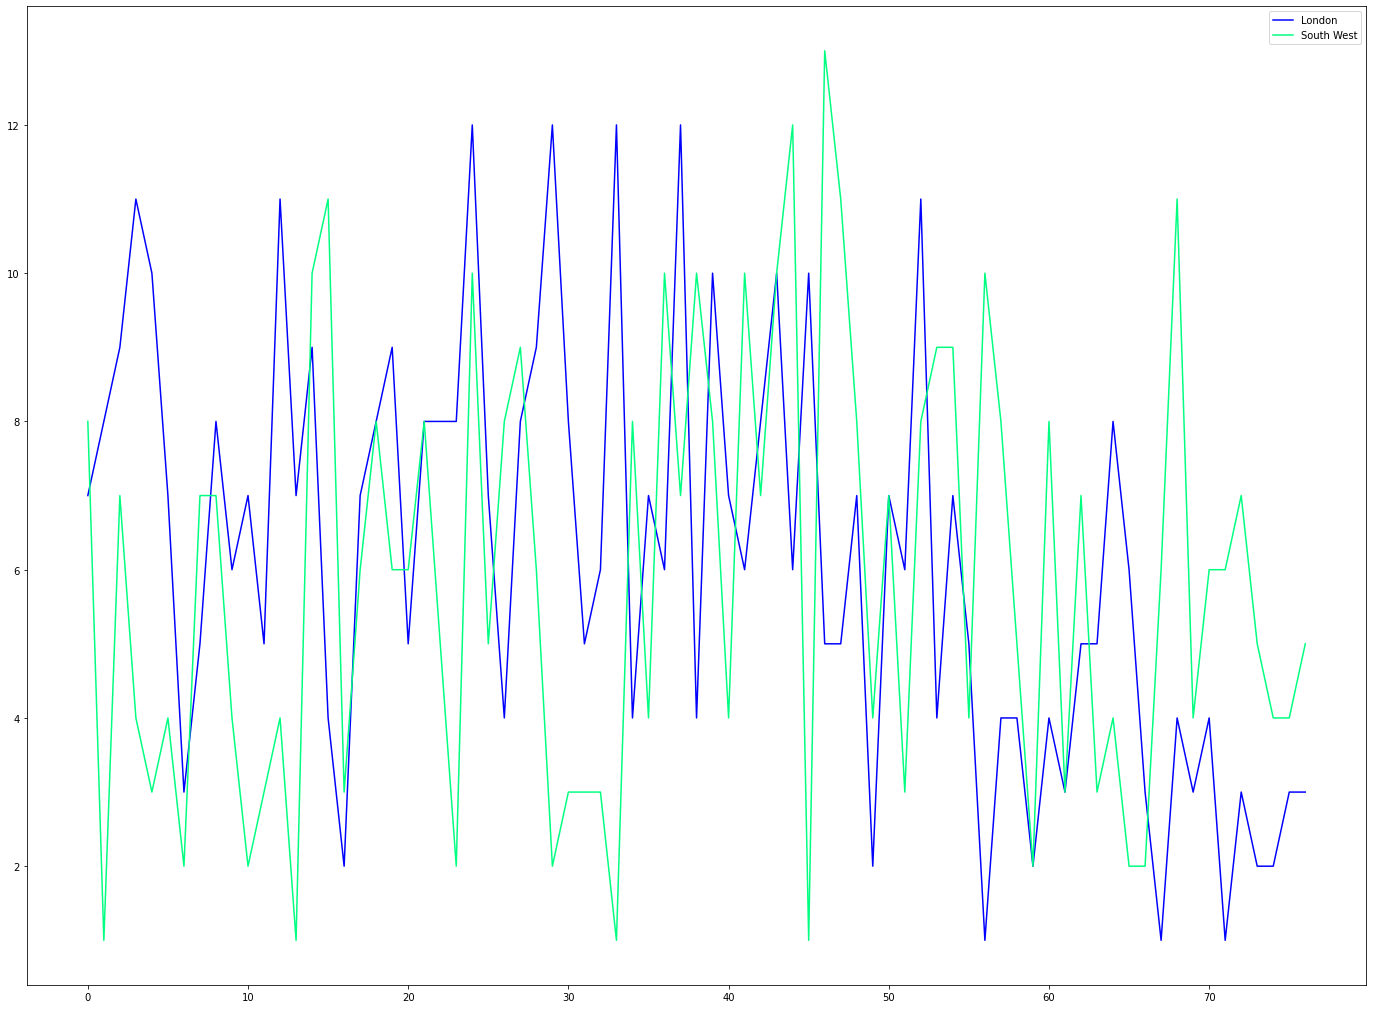

In [43]:
sample_explore.filter(items=["London", "South West"]).plot(rot=0, figsize=(24, 18), colormap='winter')

Then, to try and see the differences more precise we do a bar graph.

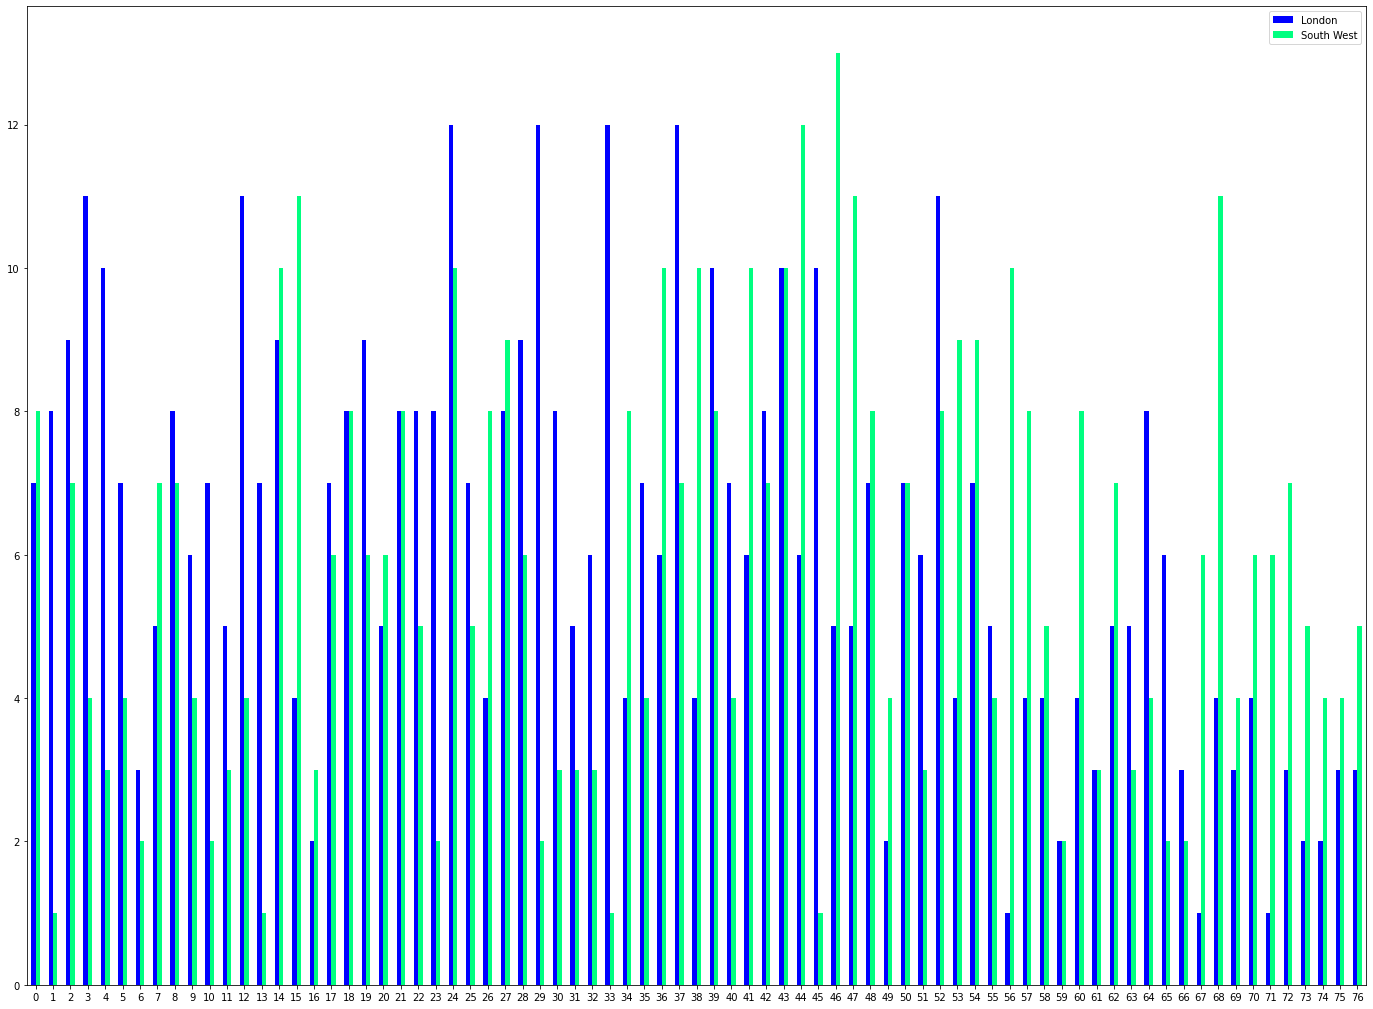

In [44]:
sample_explore.filter(items=["London", "South West"]).plot(kind="bar", rot=0, figsize=(24, 18), colormap='winter')

Afterwards, to make sure of the difference we do an area graph.

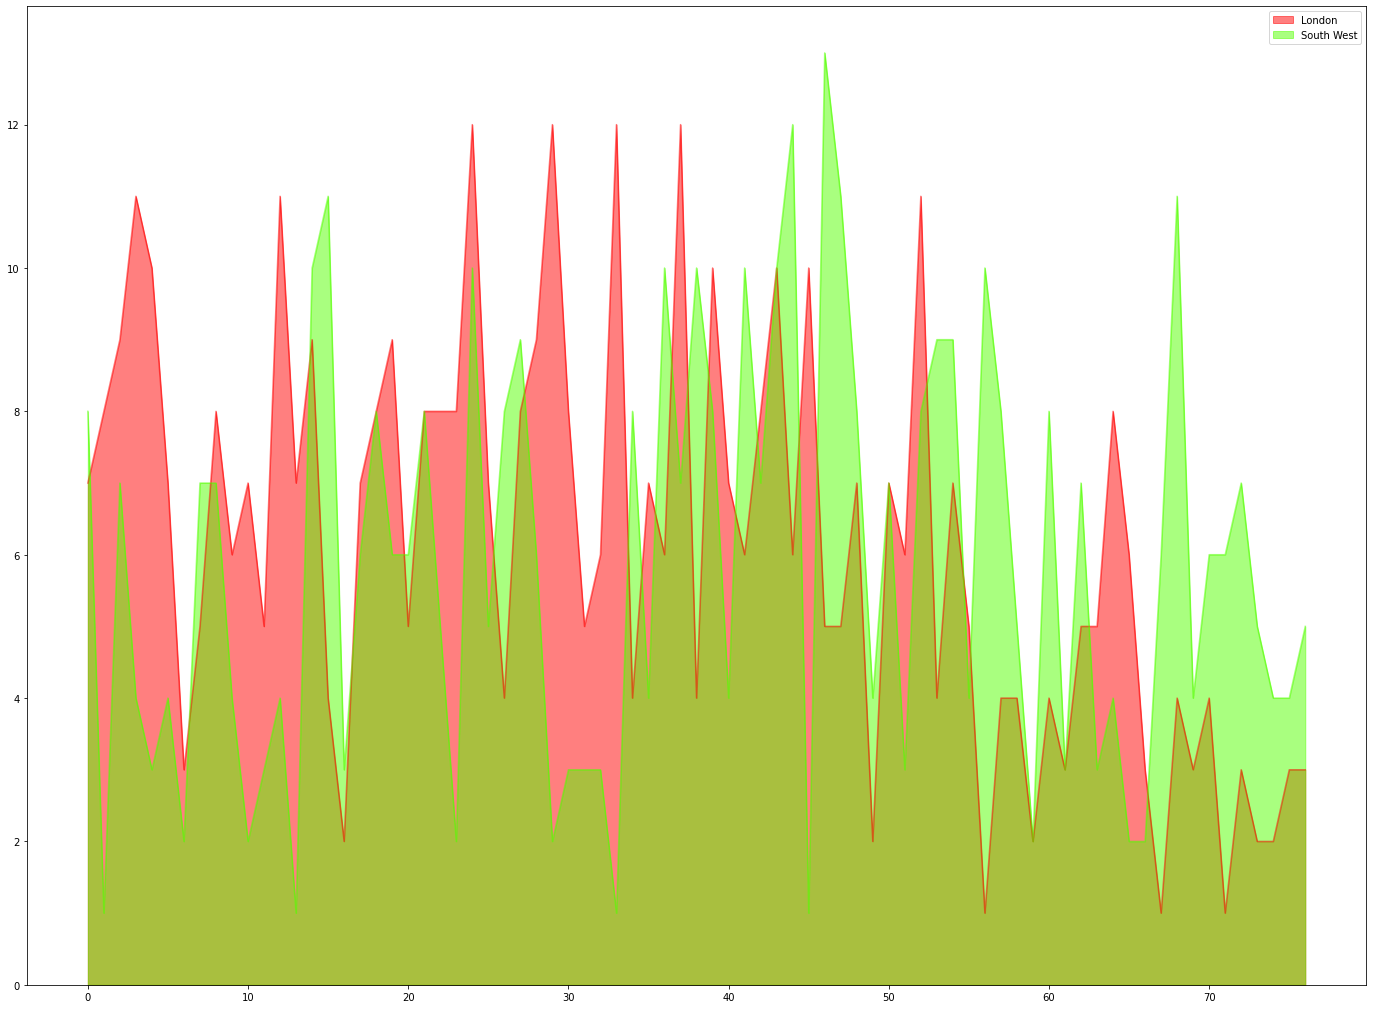

In [45]:
sample_explore.filter(items=["London", "South West"]).plot(kind="area", rot=0, figsize=(24, 18), stacked=False, colormap='prism')

In the graphs we observe that London always has the first half higher than South West

## State your hypothesis, and state the evidence that justifies it. (2 marks)

In [46]:
print("London age average is " + str(df_explore["London"].mean()) + " while the average in South West is " + str(df_explore["South West"].mean()))

London age average is 35.074 while the average in South West is 43.428


Observing the difference in average age between London and South West, as stated above and also having noticed in the 3 different plots we state our initial hypothesis:

Considering that London is a Metropolis and a very busy city, we find out that the average age is the lowest in the capital.

We assume that this is due to there being more working places and a need of a younger working force. As people get older, and retire, making it harder to make money, they decide to move out from London because it is more expensive to live there, thus lowering the average.

This makes it so that the areas near London have a higher average age. We take South West in comparison to London to prove this, where South West has the highest age average out of all the regions.

We will take as a test people from those regions with age varying from 0 to 14 and 25 to 40 (working age and school/studying age, supposing the age of the children of the people working in London).

## Plan the test. (3 marks)

For the testing of the hypothesis, I will be using the Mann-Whitney U test.

We have made the hypothesis on half the data we received and on the other half I will be using the Mann-Whitney U test to prove it.

We take the age from the data ranging from 25 to 40 and from 0 to 14, to show that London has more people that age than South West.
Proving this would confirm our initial hypothesis.

In [47]:
from scipy.stats import mannwhitneyu

mask = ((25 <= sample_test['index']) & (sample_test['index'] <= 40) | (0 <= sample_test['index']) & (sample_test['index'] <= 14))
test = sample_test[mask]

## Perform the statistical test of the hypothesis. (5 marks)

The statistical test will work as follows:

First we imported the mannwhitneyu function from SciPy library.

We will take an alpha, which will be 5%.

Then, using the mannwhitneyu function, with the null hypothesis, we compare the p-value created to the alpha. If the p-value created with the function is smaller than the alpha, we can say that what we stated is correct and that the null hypothesis is rejected, if not, it would be false.

Below we make an if statement that checks this, seeing if it true or not.

In [48]:
alpha = 0.05
t,p = mannwhitneyu(test['London'],test['South West'])
print(p/2*100, t)
if p/2 < alpha and t>0:
    print("The hypothesis has been proven correct")
else:
    print("he hypothesis has not been proven correct")

0.3048734966895306 303.5
The hypothesis has been proven correct


## Conclusions. (2 Marks) 

We took half the data from which we made the hypothesis that there are younger people in London (exclusively from 0-14 and 25-40) than in other regions, specifically South West. This may be because there are more working people in London than any other regions, and when people grow older they move out of the capital.

This hypothesis was tested by taking the other half of the data and using the Mann-Whitney U test to prove if it is correct, by rejecting the null-hypothesis.

All in all, we can safely assume that there are more younger people in London, a metropolis, because when they get older and retire they tend to move out due to the high cost of living in the capital.

 ***

